<a href="https://colab.research.google.com/github/mikehviz/R_Data_Analysis_HW-s/blob/main/hw2_datavis_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We'll work with a dataset of U.S. billion-dollar disaster events 

Data provided by NOAA National Centers for Environmental Information (NCEI) U.S. Billion-Dollar Weather and Climate Disasters (2022). https://www.ncei.noaa.gov/access/billions/, DOI: 10.25921/stkw-7w73

1. Load tidyverse

In [ ]:
library(tidyverse)
library(ggplot2)
library(dplyr)

Read in data file and call it weather

In [ ]:
weather <- read.csv("https://docs.google.com/spreadsheets/d/1iq40W4hnhxkbSMduVp6sl6MNUMuvszyUTbL4i3EmUHg/export?format=csv")

Take a look at it.  If you don't name it weather, it will show you the dataset the first time you run it.  But once you do, you need to put the name you gave it for it to show you.

In [ ]:
head(weather)
#remember head gives you the first 6 rows.  If you want the whole thing, just type weather.

,Name,Disaster,Begin.Date,End.Date,Total.CPI.Adjusted.Cost..Millions.of.Dollars.,Deaths
,<chr>,<chr>,<int>,<int>,<dbl>,<int>
1,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2551.4,7
2,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2071.0,13
3,Central/Eastern Drought/Heat Wave (Summer-Fall 1980),Drought,19800601,19801130,37675.2,1260
4,Florida Freeze (January 1981),Freeze,19810112,19810114,1921.9,0
5,"Severe Storms, Flash Floods, Hail, Tornadoes (May 1981)",Severe Storm,19810505,19810510,1304.7,20
6,"Midwest/Southeast/Northeast Winter Storm, Cold Wave (January 1982)",Winter Storm,19820108,19820116,2052.4,85


Here I rename the long column name something easier to call up.  In the first line, where I write weather <- weather, that changes the dataset.  If I hadn't done that, then it would still work once but the change would not be permanent. After rename, we'll look again to make sure the change was made.

In [ ]:
weather <- weather %>%
rename(Cost.millions = Total.CPI.Adjusted.Cost..Millions.of.Dollars.)
head(weather)

,Name,Disaster,Begin.Date,End.Date,Cost.millions,Deaths
,<chr>,<chr>,<int>,<int>,<dbl>,<int>
1,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2551.4,7
2,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2071.0,13
3,Central/Eastern Drought/Heat Wave (Summer-Fall 1980),Drought,19800601,19801130,37675.2,1260
4,Florida Freeze (January 1981),Freeze,19810112,19810114,1921.9,0
5,"Severe Storms, Flash Floods, Hail, Tornadoes (May 1981)",Severe Storm,19810505,19810510,1304.7,20
6,"Midwest/Southeast/Northeast Winter Storm, Cold Wave (January 1982)",Winter Storm,19820108,19820116,2052.4,85


2.  Run a histogram of the cost.  Rerun it with the number of deaths.  

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


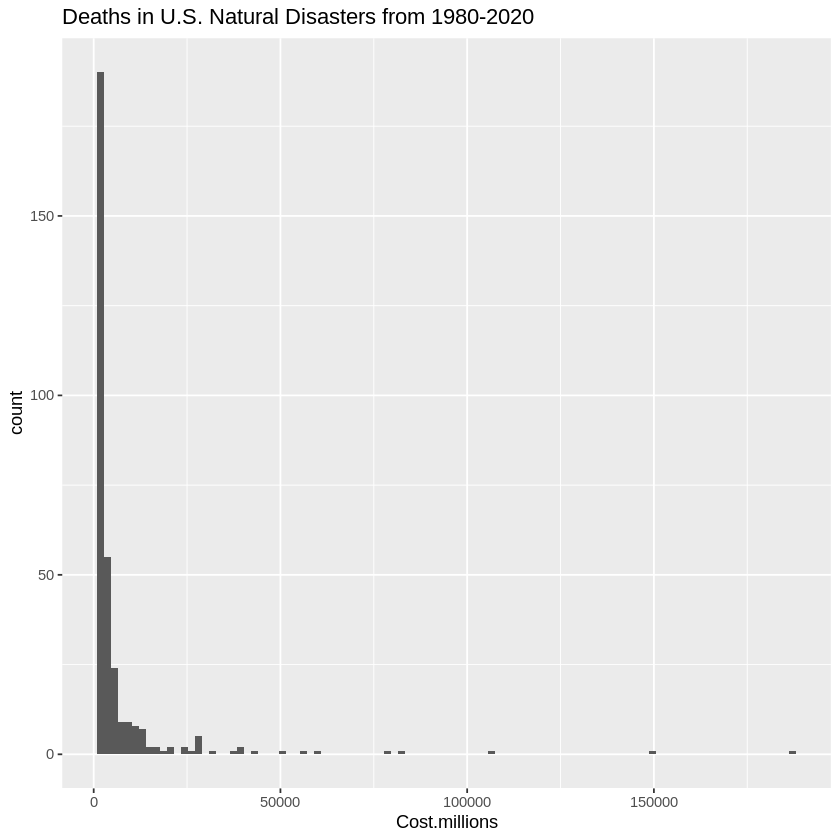

In [ ]:
ggplot(weather)+
geom_histogram(aes(x=Cost.millions), bins=100)+
labs(title='Deaths in U.S. Natural Disasters from 1980-2020')

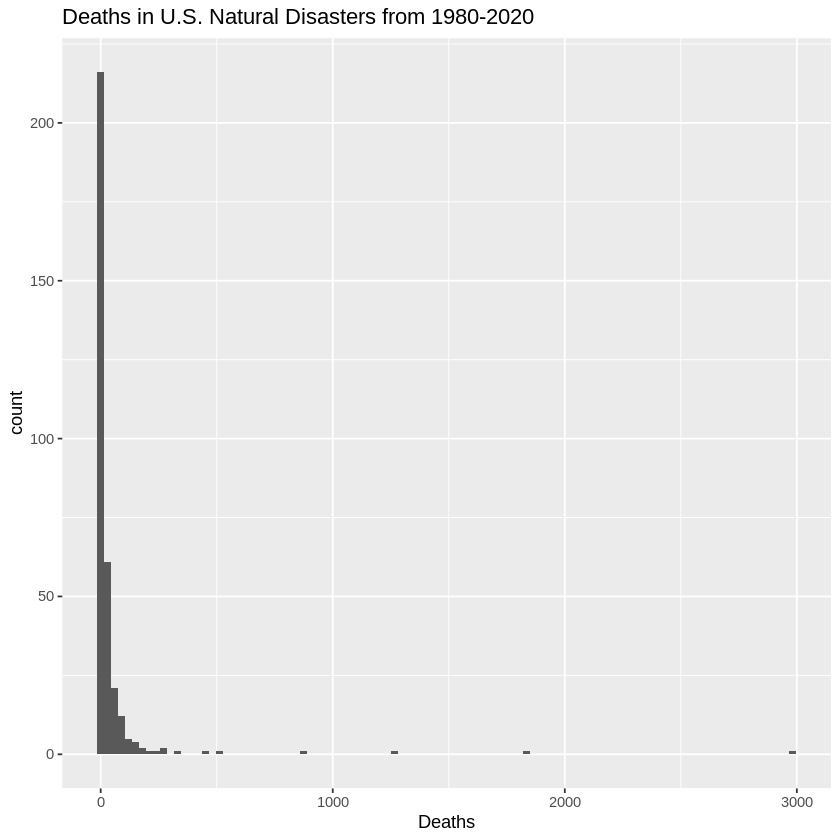

In [ ]:
ggplot(weather)+
geom_histogram(aes(x=Deaths), bins=100)+
labs(title='Deaths in U.S. Natural Disasters from 1980-2020')

These data have a strong positive skew with both cost and deaths.  Most of the cost and death are mercifully relatively small but there are a few that are quite large. We can zero in on the largest cases once we understand the overall shape of the data. 

3. First, run a scatterplot of costs vs deaths below and use color to denote different types of disasters.  Put costs on the x axis and deaths on the y axis. What kinds of disasters are the outliers? Add a text box below this one and insert your answer.

Tropical Cyclones, Droughts

Warning message:
“Removed 2 rows containing missing values (geom_point).”


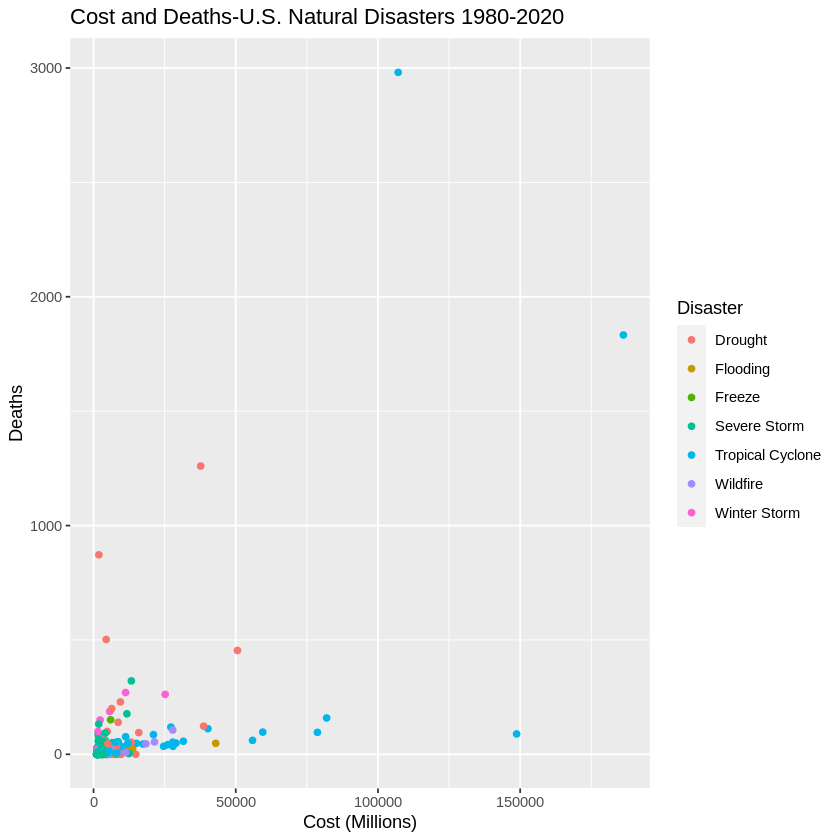

In [ ]:
ggplot(weather)+
geom_point(aes(x=Cost.millions, y=Deaths, color=Disaster))+
labs(x='Cost (Millions)', title='Cost and Deaths-U.S. Natural Disasters 1980-2020')


Again so many of the points are concentrated close together but the outliers make it hard to see the larger mass.  So rerun the scatterplot and then add the following code at the bottom.  It limits the axes so we can focus on the large number of cases at the lower values. Now we cannot see the outliers. (We recommend that you play around with the values in the code so you can see the data at different scales).



Warning message:
“Removed 42 rows containing missing values (geom_point).”


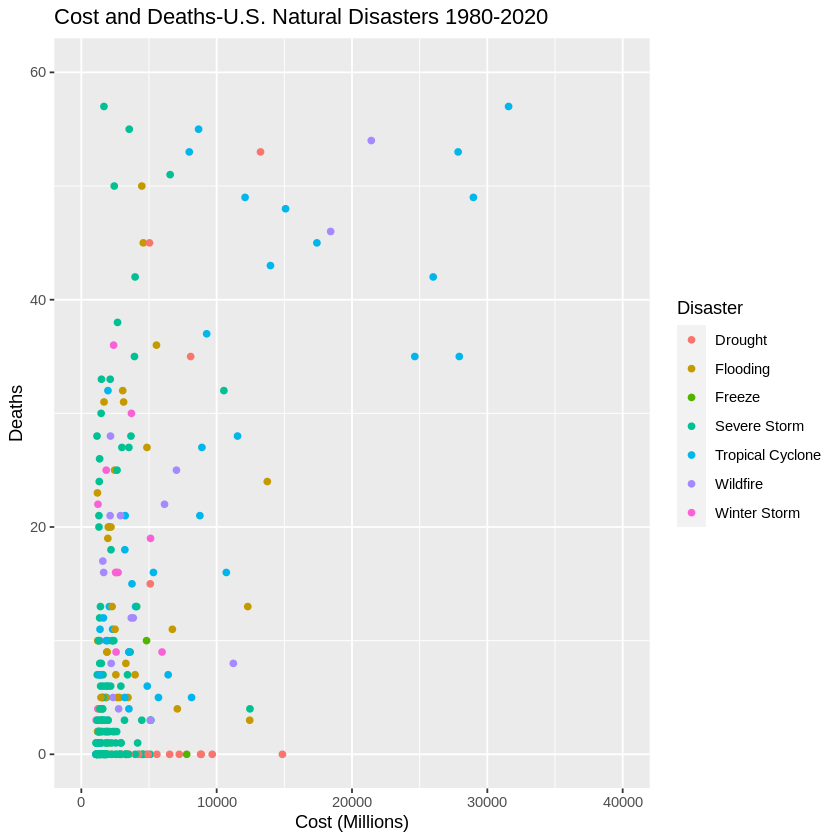

In [ ]:
ggplot(weather)+
geom_point(aes(x=Cost.millions, y=Deaths, color=Disaster))+
labs(x='Cost (Millions)', title='Cost and Deaths-U.S. Natural Disasters 1980-2020')+

scale_x_continuous(limits=c(0, 40000))+
scale_y_continuous(limits=c(0, 60))
#just remove the #, include a + at the end of your last line of code and run the code.

Severe Storms, Droughts and Freezes

What kinds of disasters can we now see that usually have no deaths?  Add a text box below this one to answer the question.

4. Add a straight line to the dataset.  What is the relationship between cost per millions and deaths?  Add the code from above that limits the outliers.  How does it change the slope of the line?

It increases the slope, showing how outliers can affect our slope

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


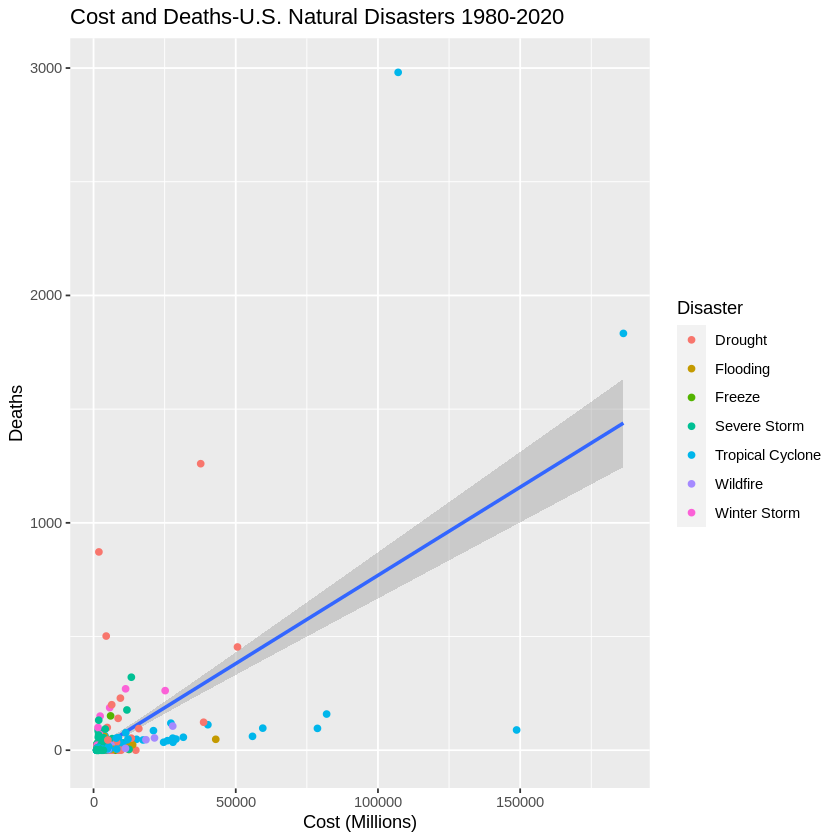

In [ ]:
ggplot(weather)+
geom_smooth(aes(x=Cost.millions, y=Deaths), method='lm')+
geom_point(aes(x=Cost.millions, y=Deaths, color=Disaster))+
labs(x='Cost (Millions)', title='Cost and Deaths-U.S. Natural Disasters 1980-2020')

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 42 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 42 rows containing missing values (geom_point).”


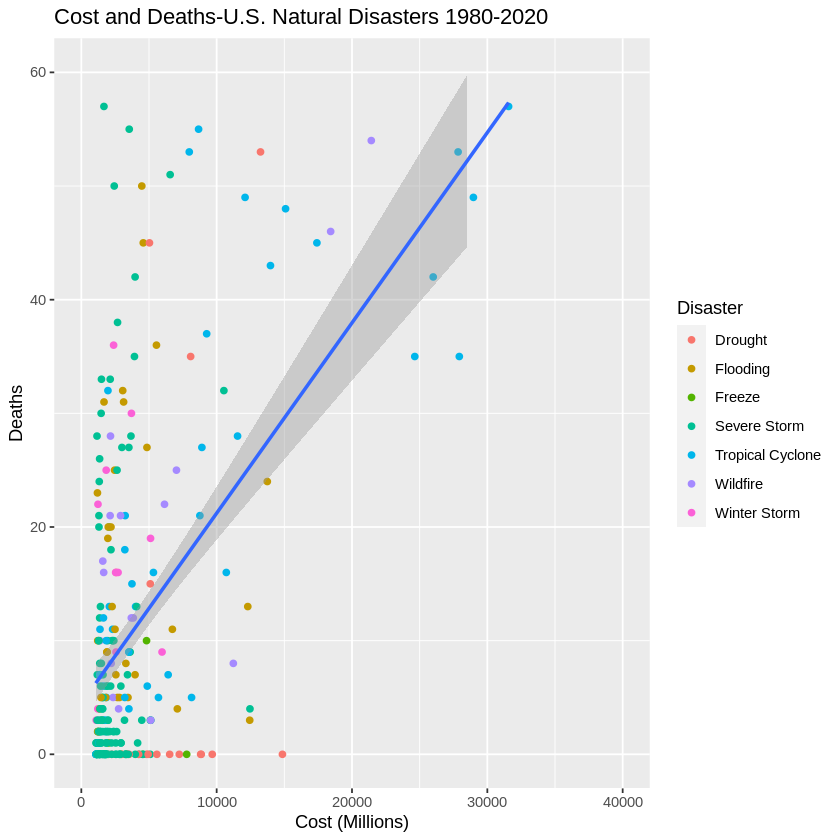

In [ ]:
ggplot(weather)+
geom_point(aes(x=Cost.millions, y=Deaths, color=Disaster))+
labs(x='Cost (Millions)', title='Cost and Deaths-U.S. Natural Disasters 1980-2020')+

scale_x_continuous(limits=c(0, 40000))+
scale_y_continuous(limits=c(0, 60))+
geom_smooth(aes(x=Cost.millions, y=Deaths), method='lm')

5. Let's look at the frequency of disasters in the dataset.  Which ones are most common?  To find out, produce a bar chart and make each disaster a different color. Put a black outline around each bar.

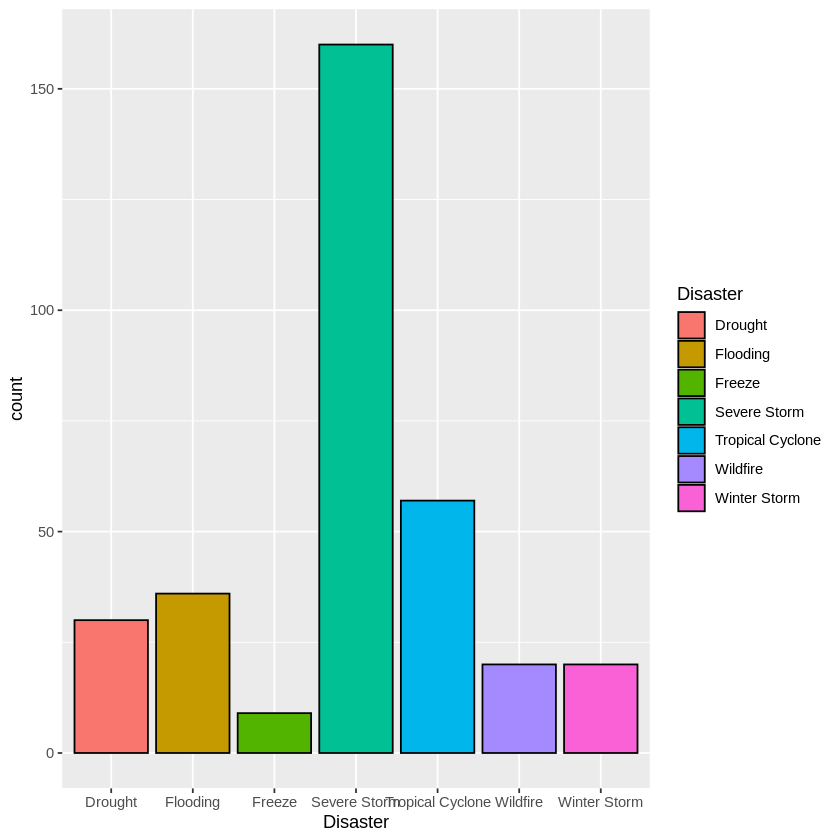

In [ ]:
ggplot(weather)+
geom_bar(aes(x=Disaster, fill=Disaster), color="black")

6.  Run the correlation with cost and deaths again using the code that limits outliers. Add a different color line for each disaster type.  Does it seem that the relationship between cost and deaths is well represented by a straight line? Why or why not? Insert a text box just below to write your answer.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 42 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 42 rows containing missing values (geom_point).”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


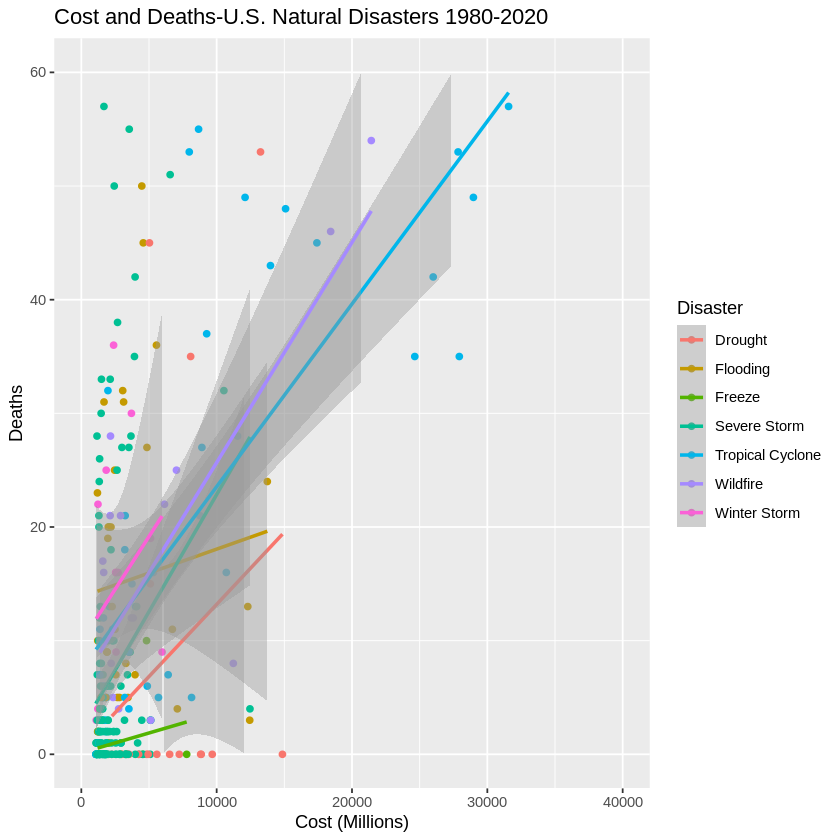

In [ ]:
ggplot(weather)+
geom_point(aes(x=Cost.millions, y=Deaths, color=Disaster))+
labs(x='Cost (Millions)', title='Cost and Deaths-U.S. Natural Disasters 1980-2020')+

scale_x_continuous(limits=c(0, 40000))+
scale_y_continuous(limits=c(0, 60))+
geom_smooth(aes(x=Cost.millions, y=Deaths, color=Disaster), method='lm')

Yes when outliers are removed I would say it does because the seperate lines of best fit for each disasters ranes overlap quite well near that main line of regression. Now you could also make the argument that line does not fit well for certain disasters like a freeze.

7.  Let's examine this relationship further.  Use facet wrap to look at costs by death for each type of disaster. Use the familiar code to limit outliers. Overall, does the data seem to vary more on the x axis or the y axis?  We have to be careful with interpretation because cost and deaths are different metrics but I'm only asking you on which axis the data are more dispersed. Add a text box to answer below. Which box fits your answer best?  Which one is the worst fit?

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 42 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 42 rows containing missing values (geom_point).”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


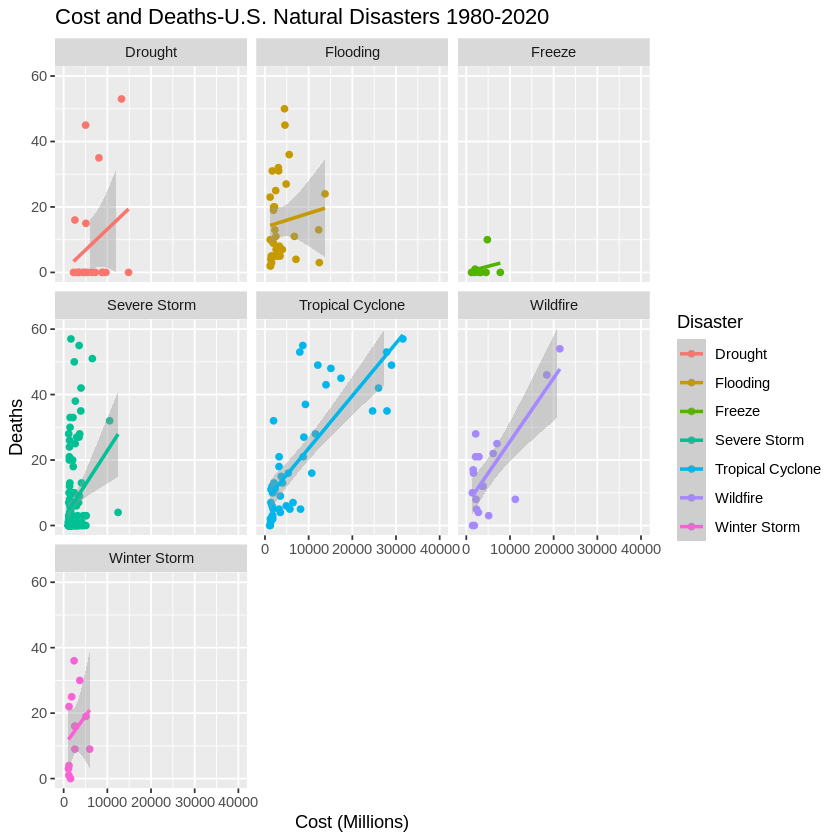

In [ ]:
ggplot(weather)+
geom_point(aes(x=Cost.millions, y=Deaths, color=Disaster))+
facet_wrap(~ Disaster)+
labs(x='Cost (Millions)', title='Cost and Deaths-U.S. Natural Disasters 1980-2020')+

scale_x_continuous(limits=c(0, 40000))+
scale_y_continuous(limits=c(0, 60))+
geom_smooth(aes(x=Cost.millions, y=Deaths, color=Disaster), method='lm')+
facet_wrap(~ Disaster)

The X axis is what is varying the most, backing my point would be the Tropical Storm but the least supportive would be the Severe Storm

8.  Let's look again at the relationship between deaths and disaster type by using a boxplot. You'll need to use the scale_y_continuous code we've been using.  Which disaster type has the highest median deaths?  Highest 3rd quartile number of deaths?  Why doesn't freeze have a box?  Put answers in a textbox below.

Warning message:
“Ignoring unknown parameters: method”
Warning message:
“Removed 12 rows containing missing values (stat_boxplot).”
Warning message:
“Removed 30 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 12 rows containing missing values (stat_boxplot).”
Warning message:
“Removed 30 rows containing non-finite values (stat_boxplot).”


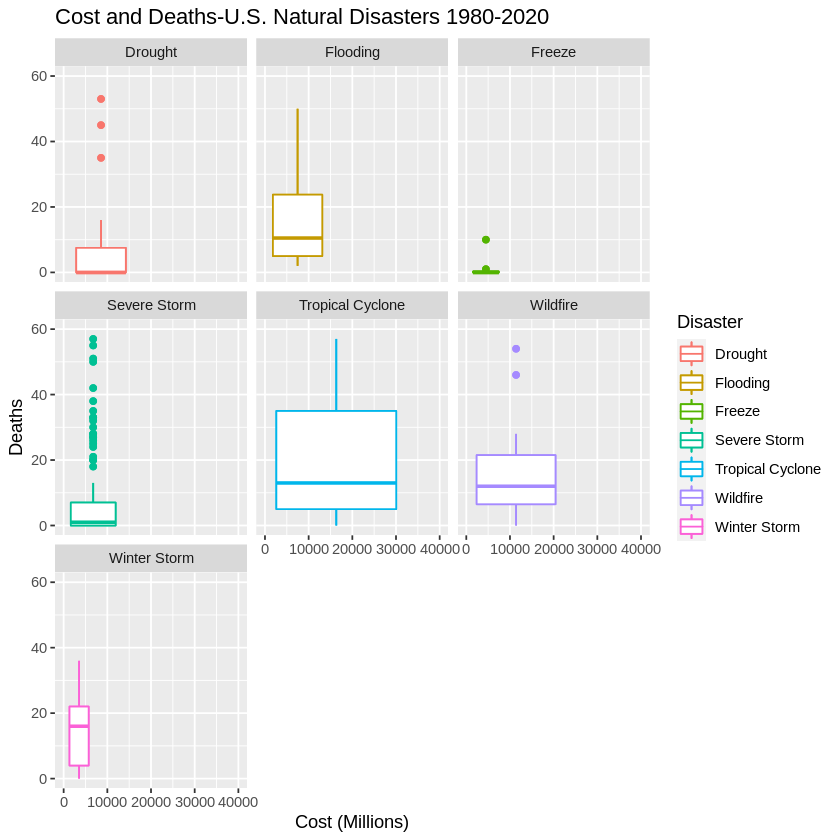

In [ ]:
ggplot(weather)+
geom_boxplot(aes(x=Cost.millions, y=Deaths, color=Disaster))+
facet_wrap(~ Disaster)+
labs(x='Cost (Millions)', title='Cost and Deaths-U.S. Natural Disasters 1980-2020')+

scale_x_continuous(limits=c(0, 40000))+
scale_y_continuous(limits=c(0, 60))+
geom_boxplot(aes(x=Cost.millions, y=Deaths, color=Disaster), method='lm')+
facet_wrap(~ Disaster)

I would say Winter Storms have the highest median deaths, Tropical Cyclones have the highest 3rd quartile deaths and Freezes don't have a boxplot because it is actually so small that the mean and quartiles are nearly the same.